<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,51.071067,78.602178,48.054638,30.006110,75.821156,293.555149,244.911536,48.643613
1,0.0,1.0,81.734340,66.372755,52.589042,77.224767,-36.067655,251.853248,281.131205,-29.277957
2,0.0,2.0,84.699133,77.149615,63.039900,69.930958,-75.444918,229.374688,302.612651,-73.237963
3,0.0,3.0,46.237420,21.882496,73.283706,21.350661,-11.658462,161.095821,173.131535,-12.035714
4,0.0,4.0,83.323729,83.190818,24.142236,95.518416,-61.291483,234.883715,295.790049,-60.906334
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,54.451357,75.602603,71.791837,88.780228,61.797786,362.423811,308.338111,54.085699
119996,999.0,116.0,63.654874,39.962850,71.654232,77.866227,-13.782452,249.355730,266.160552,-16.804822
119997,999.0,117.0,39.145185,86.901125,58.723954,49.977188,66.268250,311.015701,254.466514,56.549187
119998,999.0,118.0,74.804466,51.273760,88.188355,47.869350,-3.564575,268.571357,279.034308,-10.462952


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    51.071067  78.602178  48.054638  30.006110  75.821156   
      1.0    81.734340  66.372755  52.589042  77.224767 -36.067655   
      2.0    84.699133  77.149615  63.039900  69.930958 -75.444918   
      3.0    46.237420  21.882496  73.283706  21.350661 -11.658462   
      4.0    83.323729  83.190818  24.142236  95.518416 -61.291483   
...                ...        ...        ...        ...        ...   
999.0 115.0  54.451357  75.602603  71.791837  88.780228  61.797786   
      116.0  63.654874  39.962850  71.654232  77.866227 -13.782452   
      117.0  39.145185  86.901125  58.723954  49.977188  66.268250   
      118.0  74.804466  51.273760  88.188355  47.869350  -3.564575   
      119.0  46.746167  52.037858  80.484572  78.563474 -87.469117   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    293.555149  244.911536  48.643613  
      1.0    251.853248  281.131205 -29.277957  
      2.0    229.374688  302.612651 -73.237963  
      3.0    161.095821  173.131535 -12.035714  
      4.0    234.883715  295.790049 -60.906334  
...                 ...         ...        ...  
999.0 115.0  362.423811  308.338111  54.085699  
      116.0  249.355730  266.160552 -16.804822  
      117.0  311.015701  254.466514  56.549187  
      118.0  268.571357  279.034308 -10.462952  
      119.0  180.362955  270.827129 -90.464174  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    51.071067  78.602178  48.054638  30.006110  75.821156   
      1.0    81.734340  66.372755  52.589042  77.224767 -36.067655   
      2.0    84.699133  77.149615  63.039900  69.930958 -75.444918   
      3.0    46.237420  21.882496  73.283706  21.350661 -11.658462   
      4.0    83.323729  83.190818  24.142236  95.518416 -61.291483   
...                ...        ...        ...        ...        ...   
999.0 115.0  54.451357  75.602603  71.791837  88.780228  61.797786   
      116.0  63.654874  39.962850  71.654232  77.866227 -13.782452   
      117.0  39.145185  86.901125  58.723954  49.977188  66.268250   
      118.0  74.804466  51.273760  88.188355  47.869350  -3.564575   
      119.0  46.746167  52.037858  80.484572  78.563474 -87.469117   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    293.555149  244.911536  48.643613  
      1.0    251.853248  281.131205 -29.277957  
      2.0    229.374688  302.612651 -73.237963  
      3.0    161.095821  173.131535 -12.035714  
      4.0    234.883715  295.790049 -60.906334  
...                 ...         ...        ...  
999.0 115.0  362.423811  308.338111  54.085699  
      116.0  249.355730  266.160552 -16.804822  
      117.0  311.015701  254.466514  56.549187  
      118.0  268.571357  279.034308 -10.462952  
      119.0  180.362955  270.827129 -90.464174  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,51.071067,78.602178,48.054638,30.006110,75.821156,293.555149,244.911536,48.643613
1,0.0,1.0,81.734340,66.372755,52.589042,77.224767,-36.067655,251.853248,281.131205,-29.277957
2,0.0,2.0,84.699133,77.149615,63.039900,69.930958,-75.444918,229.374688,302.612651,-73.237963
3,0.0,3.0,46.237420,21.882496,73.283706,21.350661,-11.658462,161.095821,173.131535,-12.035714
4,0.0,4.0,83.323729,83.190818,24.142236,95.518416,-61.291483,234.883715,295.790049,-60.906334
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,54.451357,75.602603,71.791837,88.780228,61.797786,362.423811,308.338111,54.085699
119996,999.0,116.0,63.654874,39.962850,71.654232,77.866227,-13.782452,249.355730,266.160552,-16.804822
119997,999.0,117.0,39.145185,86.901125,58.723954,49.977188,66.268250,311.015701,254.466514,56.549187
119998,999.0,118.0,74.804466,51.273760,88.188355,47.869350,-3.564575,268.571357,279.034308,-10.462952


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    51.071067  78.602178  48.054638  30.006110  75.821156   
      1.0    81.734340  66.372755  52.589042  77.224767 -36.067655   
      2.0    84.699133  77.149615  63.039900  69.930958 -75.444918   
      3.0    46.237420  21.882496  73.283706  21.350661 -11.658462   
      4.0    83.323729  83.190818  24.142236  95.518416 -61.291483   
...                ...        ...        ...        ...        ...   
999.0 115.0  54.451357  75.602603  71.791837  88.780228  61.797786   
      116.0  63.654874  39.962850  71.654232  77.866227 -13.782452   
      117.0  39.145185  86.901125  58.723954  49.977188  66.268250   
      118.0  74.804466  51.273760  88.188355  47.869350  -3.564575   
      119.0  46.746167  52.037858  80.484572  78.563474 -87.469117   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    293.555149  244.911536  48.643613  
      1.0    251.853248  281.131205 -29.277957  
      2.0    229.374688  302.612651 -73.237963  
      3.0    161.095821  173.131535 -12.035714  
      4.0    234.883715  295.790049 -60.906334  
...                 ...         ...        ...  
999.0 115.0  362.423811  308.338111  54.085699  
      116.0  249.355730  266.160552 -16.804822  
      117.0  311.015701  254.466514  56.549187  
      118.0  268.571357  279.034308 -10.462952  
      119.0  180.362955  270.827129 -90.464174  

[120000 rows x 8 columns]

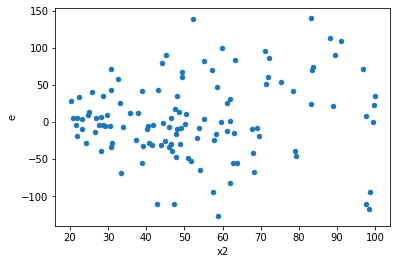

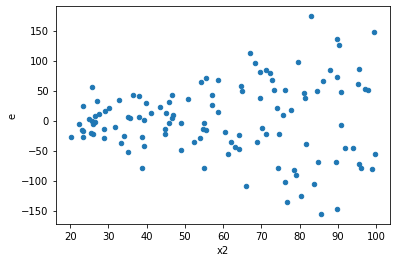

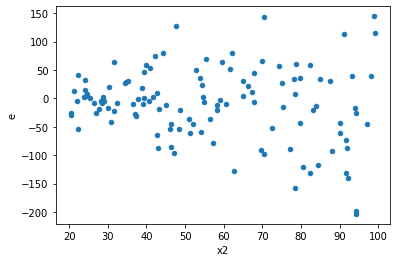

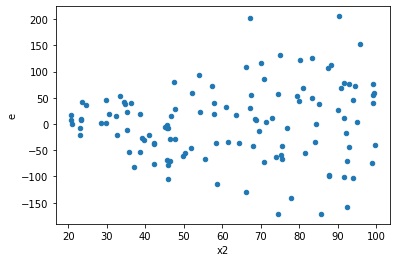

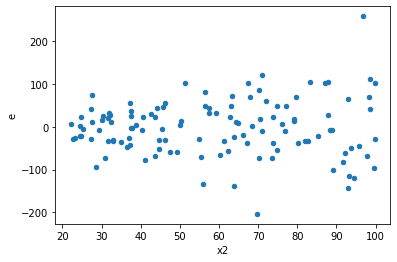

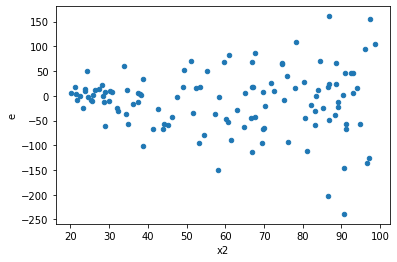

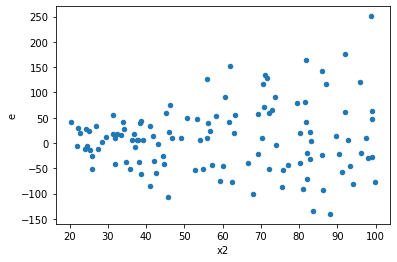

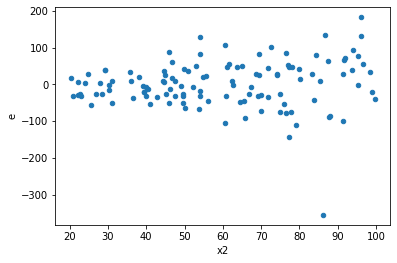

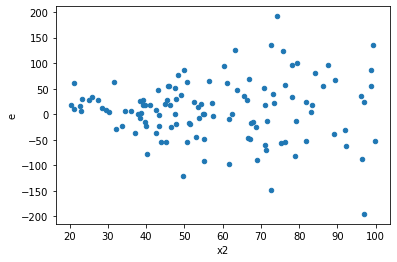

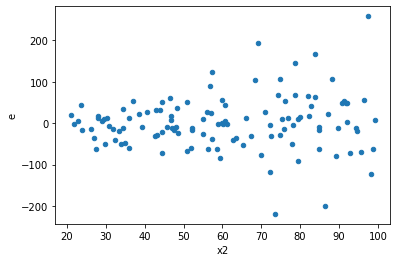

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,58.0,54.0,73857.72681773067,426355.01282399293,1273.409083064322,7895.463200444314,6.200256701047499,2.391375986121602e-10,0.9999999998804312,1.195687993060801e-10,Reject005=0 : Heteroscedasticity
1.0,61.0,51.0,159379.43596301533,303566.10912328307,2612.7776387379563,5952.276649476138,2.278141301129342,0.002972605207193002,0.9985136973964035,0.001486302603596501,Reject005=0 : Heteroscedasticity
3.0,58.0,54.0,119969.42593392663,313994.31758737046,2068.4383781711485,5814.709584951305,2.8111592041202105,0.00018226573976232174,0.9999088671301188,9.113286988116087e-05,Reject005=0 : Heteroscedasticity
4.0,60.0,52.0,86807.36876535678,244416.7438080308,1446.7894794226129,4700.321996308285,3.248794702449797,2.666060745482035e-05,0.9999866696962726,1.3330303727410175e-05,Reject005=0 : Heteroscedasticity
7.0,53.0,59.0,209965.9756702562,275411.46043262415,3961.6221824576637,4667.99085479024,1.1783028869992764,0.5381307834775586,0.7309346082612207,0.2690653917387793,Reject005=1 : Homoscedasticity
9.0,53.0,59.0,231637.1013309645,302337.0336256749,4370.511345867255,5124.356502130083,1.1724844295337804,0.5503699159518778,0.7248150420240611,0.2751849579759389,Reject005=1 : Homoscedasticity
11.0,40.0,72.0,47817.276880953556,354228.70523577265,1195.431922023839,4919.8431282746205,4.115536014753093,1.8245251598436596e-07,0.999999908773742,9.122625799218298e-08,Reject005=0 : Heteroscedasticity
13.0,53.0,59.0,172898.2912203675,405781.31756550027,3262.2319098182547,6877.6494502627165,2.1082650284804196,0.005675640157352779,0.9971621799213236,0.0028378200786763896,Reject005=0 : Heteroscedasticity
15.0,45.0,67.0,165035.34964735995,299883.07023107837,3667.4522143857766,4475.866719866841,1.220429458442571,0.4535027109786456,0.7732486445106772,0.2267513554893228,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,58.0,54.0,73857.72681773067,426355.01282399293,1273.409083064322,7895.463200444314,6.200256701047499,2.391375986121602e-10,Reject005=0 : Heteroscedasticity
1.0,61.0,51.0,159379.43596301533,303566.10912328307,2612.7776387379563,5952.276649476138,2.278141301129342,0.002972605207193002,Reject005=0 : Heteroscedasticity
2.0,64.0,48.0,304736.29406639724,89723.01268583142,4761.504594787457,1869.2294309548213,0.3925711702559555,0.0005110663795957841,Reject005=0 : Heteroscedasticity
3.0,58.0,54.0,119969.42593392663,313994.31758737046,2068.4383781711485,5814.709584951305,2.8111592041202105,0.00018226573976232174,Reject005=0 : Heteroscedasticity
4.0,60.0,52.0,86807.36876535678,244416.7438080308,1446.7894794226129,4700.321996308285,3.248794702449797,2.666060745482035e-05,Reject005=0 : Heteroscedasticity
5.0,57.0,55.0,349862.23928202764,170845.4830252186,6137.934022491713,3106.281509549429,0.506079325415822,0.011758081807120254,Reject005=0 : Heteroscedasticity
6.0,60.0,52.0,368279.53675971343,124093.26766963508,6137.992279328557,2386.4089936468285,0.3887930914614772,0.00047935071121692874,Reject005=0 : Heteroscedasticity
7.0,53.0,59.0,209965.9756702562,275411.46043262415,3961.6221824576637,4667.99085479024,1.1783028869992764,0.5381307834775586,Reject005=1 : Homoscedasticity
8.0,55.0,57.0,219027.23231235126,225456.39494710343,3982.3133147700228,3955.375349949183,0.993235598836252,0.9811053842857731,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    558
Reject005=1 : Homoscedasticity      442
Name: Result_test, dtype: int64